In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Royal Challengers Bangalore') & (df2['team2'] == 'Sunrisers Hyderabad')]
match2 = df2[(df2['team1'] == 'Sunrisers Hyderabad') & (df2['team2'] == 'Royal Challengers Bangalore')]

Match1 = Bangalore Home Ground

Match2 = Hyderabad Home Ground

# Overall Bangalore vs Hyderabad:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date                        team1  \
387   388    2013  Hyderabad  2013-04-07  Royal Challengers Bangalore   
502   503    2014  Hyderabad  2014-05-20  Royal Challengers Bangalore   
524   525    2015  Bangalore  2015-04-13  Royal Challengers Bangalore   
579   580    2016  Bangalore  2016-04-12  Royal Challengers Bangalore   
686  7944    2018  Bengaluru    17/05/18  Royal Challengers Bangalore   

                   team2                  toss_winner toss_decision  result  \
387  Sunrisers Hyderabad  Royal Challengers Bangalore           bat     tie   
502  Sunrisers Hyderabad  Royal Challengers Bangalore           bat  normal   
524  Sunrisers Hyderabad          Sunrisers Hyderabad         field  normal   
579  Sunrisers Hyderabad          Sunrisers Hyderabad         field  normal   
686  Sunrisers Hyderabad          Sunrisers Hyderabad         field  normal   

     dl_applied                       winner  win_by_runs  win_by_wickets  \
387           0          Sunrisers Hyderabad            0               0   
502           0          Sunrisers Hyderabad            0               7   
524           0          Sunrisers Hyderabad            0               8   
579           0  Royal Challengers Bangalore           45               0   
686           0  Royal Challengers Bangalore           14               0   

    player_of_match                                      venue  \
387       GH Vihari  Rajiv Gandhi International Stadium, Uppal   
502       DA Warner  Rajiv Gandhi International Stadium, Uppal   
524       DA Warner                      M Chinnaswamy Stadium   
579  AB de Villiers                      M Chinnaswamy Stadium   
686  AB de Villiers                      M Chinnaswamy Stadium   

             umpire1         umpire2        umpire3  
387     AK Chaudhary          S Ravi            NaN  
502     AK Chaudhary        NJ Llong            NaN  
524     RM Deshpande  RK Illingworth            NaN  
579  HDPK Dharmasena       VK Sharma            NaN  
686           S Ravi   Anil Dandekar  C Shamshuddin

Matches played between Bangalore and Hyderabad.

In [6]:
match.shape

(14, 18)

In [7]:
match['winner'].value_counts()

Sunrisers Hyderabad            8
Royal Challengers Bangalore    6
Name: winner, dtype: int64

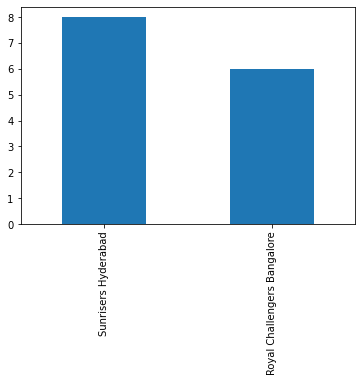

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Hyderabad won 8 times and Bangalore won 6 times against each other.

In [9]:
match['toss_winner'].value_counts()

Royal Challengers Bangalore    8
Sunrisers Hyderabad            6
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    9
bat      5
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Sunrisers Hyderabad            2
Royal Challengers Bangalore    2
Name: winner, dtype: int64

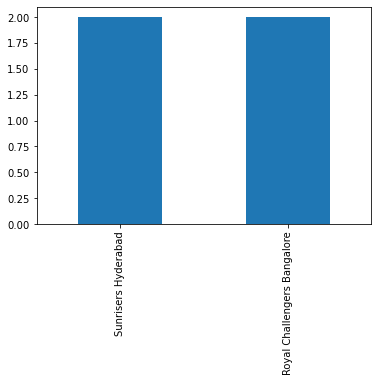

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Both won the toss and won the match 2 times. So winning toss doesn't have much affect to winning the match.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Hyderabad and Bangalore.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## What will be Sandeep Sharma's economy rate and how many boundaries will he give away:

In [15]:
economy_rate_list = []
boundary_list = []
for k in ids:
    runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'Sandeep Sharma')]['total_runs'])
    batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'Sandeep Sharma')]['batsman_runs'])
    bye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'Sandeep Sharma')]['bye_runs'])
    legbye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'Sandeep Sharma')]['legbye_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'Sandeep Sharma')]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'Sandeep Sharma')]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    boundary_count = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if batsman_runs[i] >= 4:
            boundary_count += 1
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls = len(runs) - noball - wideball
    total_runs = s - bye - legbye
    if total_balls > 6:
        economy_rate = (total_runs/total_balls)*6
    else:
        economy_rate = 0
    if economy_rate > 0:
        economy_rate_list.append(economy_rate)
        boundary_list.append(boundary_count)
print('The Economy rates of Sandeep Sharma against Bangalore are',economy_rate_list)
print('The number of Boundaries given away by Sandeep Sharma against Bangalore are',boundary_list)
print('The average economy rate of Sandeep Sharma against Bangalore is', np.mean(economy_rate_list))
print('The average Boundaries given away by Sandeep Sharma against Bangalore is', np.mean(boundary_list))

The Economy rates of Sandeep Sharma against Bangalore are [10.25, 5.25]
The number of Boundaries given away by Sandeep Sharma against Bangalore are [6, 1]
The average economy rate of Sandeep Sharma against Bangalore is 7.75
The average Boundaries given away by Sandeep Sharma against Bangalore is 3.5


**Sandeep Sharma played only two matches against Bangalore for Hyderabad.**

**So Sandeep Sharma's average economy rate against Bangalore is 7.75 and average Boundaries given away is ~4.**

In [16]:
economy_rate_list_overall = []
boundary_list_overall = []
total_ids = list(df1[df1['bowler'] == 'Sandeep Sharma']['match_id'].unique())
for k in total_ids:
    runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'Sandeep Sharma')]['total_runs'])
    batsman_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'Sandeep Sharma')]['batsman_runs'])
    bye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'Sandeep Sharma')]['bye_runs'])
    legbye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'Sandeep Sharma')]['legbye_runs'])
    wide_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'Sandeep Sharma')]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'Sandeep Sharma')]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    boundary_count = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if batsman_runs[i] >= 4:
            boundary_count += 1
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls = len(runs) - noball - wideball
    total_runs = s - bye - legbye
    if total_balls > 6:
        economy_rate = (total_runs/total_balls)*6
    else:
        economy_rate = 0
    if economy_rate > 0:
        economy_rate_list_overall.append(economy_rate)
        boundary_list_overall.append(boundary_count)
print('The Economy rates of Sandeep Sharma in overall IPL are\n',economy_rate_list_overall)
print('\n\nThe number of Boundaries given away by Sandeep Sharma in overall IPL are\n',boundary_list_overall)
print('\n\nThe average economy rate of Sandeep Sharma in overall IPL is', np.mean(economy_rate_list_overall))
print('The average Boundaries given away by Sandeep Sharma in overall IPL is', np.mean(boundary_list_overall))

The Economy rates of Sandeep Sharma in overall IPL are
 [8.25, 6.5, 9.333333333333334, 10.25, 8.75, 13.0, 10.0, 5.0, 5.5, 7.25, 7.75, 10.5, 6.0, 5.75, 9.0, 5.25, 9.75, 6.5, 5.25, 5.0, 9.157894736842106, 9.25, 6.25, 8.0, 16.25, 8.75, 12.333333333333332, 10.666666666666666, 4.75, 3.0, 7.5, 6.25, 6.25, 8.0, 8.75, 3.3333333333333335, 8.0, 10.25, 8.75, 8.25, 10.0, 4.5, 7.0, 3.0, 5.75, 10.5, 7.5, 5.0, 7.75, 6.25, 9.0, 12.25, 2.75, 8.75, 9.666666666666668, 7.25, 6.25, 3.3333333333333335, 4.25, 3.75, 9.0, 5.25, 6.0, 9.25, 10.25, 16.0, 10.0, 13.75]


The number of Boundaries given away by Sandeep Sharma in overall IPL are
 [5, 4, 5, 8, 4, 5, 7, 2, 3, 4, 4, 5, 1, 4, 6, 3, 5, 2, 3, 3, 5, 5, 4, 5, 11, 5, 6, 5, 2, 1, 4, 4, 2, 5, 7, 1, 4, 5, 6, 4, 3, 1, 2, 1, 3, 3, 4, 2, 4, 2, 4, 7, 1, 4, 5, 4, 3, 1, 2, 1, 4, 1, 3, 4, 6, 5, 5, 9]


The average economy rate of Sandeep Sharma in overall IPL is 7.828302373581012
The average Boundaries given away by Sandeep Sharma in overall IPL is 3.9411764705882355


**So Sandeep Sharma's average economy rate in overall IPL is 7.83 and average Boundaries given away is ~4.**

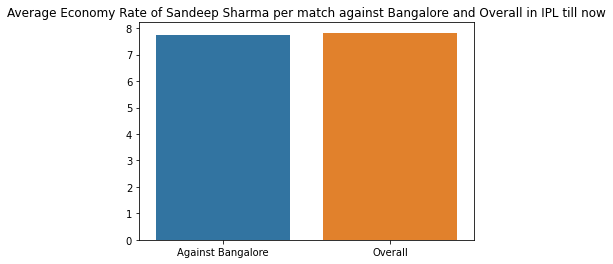

In [17]:
economy_Sandeep = pd.Series([np.mean(economy_rate_list),np.mean(economy_rate_list_overall)],index = ['Against Bangalore', 'Overall'])
sns.barplot(x = economy_Sandeep.index , y = economy_Sandeep)
plt.title('Average Economy Rate of Sandeep Sharma per match against Bangalore and Overall in IPL till now')
plt.show()

**Sandeep Sharma's economy rate is greater than 7.5 against Bangalore or in overall IPL.**

## How many batsmen in the match from both the teams, will have a strike rate more than 130 and hit more than 3 boundaries of which, atleast two boundaries should be 4s:

In [18]:
strike_rate_dict = {}
for j in ids:
    batsman = list(delivery[delivery['match_id'] == j]['batsman'].unique())
    counter = 0
    for k in batsman:
        batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == k)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        fours = 0
        sixes = 0
        strike_rate = 0
        for i in batsman_runs:
            if i == 4 or i == 5:
                fours += 1
            elif i == 6 or i == 7:
                sixes += 1
        total_balls = len(batsman_runs)
        if total_balls > 10:
            strike_rate = np.round((total_run/total_balls)*100,2)
        else:
            strike_rate = 0
        if strike_rate > 130 and (fours+sixes)>3 and fours>=2:
            counter += 1
    strike_rate_dict[j] = counter
strike_rate_dict

{388: 0,
 503: 1,
 525: 4,
 580: 5,
 7944: 5,
 1: 5,
 432: 3,
 481: 2,
 568: 4,
 603: 5,
 636: 5,
 7932: 2,
 11147: 2,
 11345: 5}

These are the number of batsmen match wise who had strike rate greater than 130, hit more than 3 boundaries, atleast two of them are fours and played more than 10 balls in Hyderabad vs Bangalore match.

In [19]:
np.mean(list(strike_rate_dict.values()))

3.4285714285714284

So ~3 batsmen in an average satisfied the conditions given per match.

In [20]:
strike_rate_dict = {}
batsman = ['V Kohli', 'AB de Villiers', 'PA Patel', 'M Ali', 'S Dube', 'Gurkeerat Singh', 'Washington Sundar', 'DA Warner', 'KS Williamson', 'MK Pandey', 'WP Saha', 'J Bairstow', 'V Shankar']
for j in batsman:
    counter = 0
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        fours = 0
        sixes = 0
        strike_rate = 0
        for i in batsman_runs:
            if i == 4 or i == 5:
                fours += 1
            elif i == 6 or i == 7:
                sixes += 1
        total_balls = len(batsman_runs)
        if total_balls > 10:
            strike_rate = np.round((total_run/total_balls)*100,2)
        else:
            strike_rate = 0
        if strike_rate > 130 and (fours+sixes)>3 and fours>=2:
            counter += 1
    strike_rate_dict[j] = counter
strike_rate_dict

{'V Kohli': 5,
 'AB de Villiers': 5,
 'PA Patel': 1,
 'M Ali': 1,
 'S Dube': 0,
 'Gurkeerat Singh': 1,
 'Washington Sundar': 0,
 'DA Warner': 6,
 'KS Williamson': 4,
 'MK Pandey': 1,
 'WP Saha': 1,
 'J Bairstow': 1,
 'V Shankar': 0}

These are the current RCB and SRH batsmen who satisfied the condition number of times in RCB vs SRH match earlier.

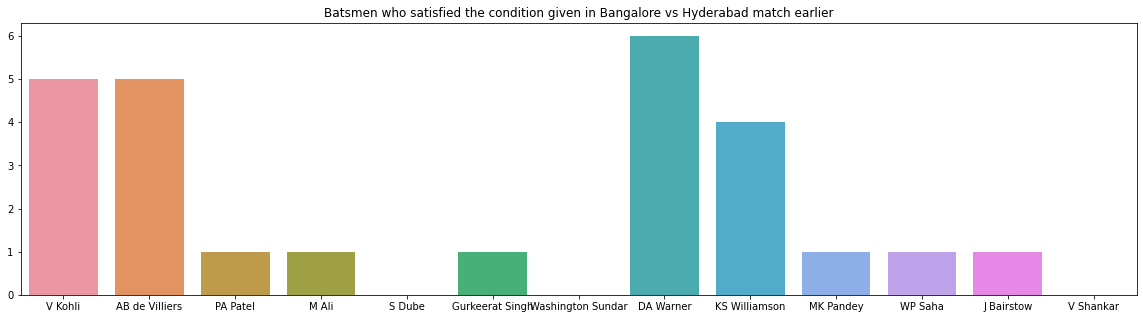

In [21]:
strike_rate = pd.Series(list(strike_rate_dict.values()),index = list(strike_rate_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = strike_rate.index, y = strike_rate,ax=ax)
plt.title('Batsmen who satisfied the condition given in Bangalore vs Hyderabad match earlier')
plt.show()

**David Warner most of the time satisfied the conditions given among current Bangalore and Hyderabad batsmen in SRH vs RCB match till now followed by Virat Kohli and AB de Villiers.**

In [22]:
strike_rate_dict_overall = {}
batsman_overall = ['V Kohli', 'AB de Villiers', 'PA Patel', 'M Ali', 'S Dube', 'Gurkeerat Singh', 'Washington Sundar', 'AJ Finch', 'DA Warner', 'KS Williamson', 'MK Pandey', 'WP Saha', 'J Bairstow', 'V Shankar','JO Holder']
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    counter = 0
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        fours = 0
        sixes = 0
        strike_rate = 0
        for i in batsman_runs:
            if i == 4 or i == 5:
                fours += 1
            elif i == 6 or i == 7:
                sixes += 1
        total_balls = len(batsman_runs)
        if total_balls > 10:
            strike_rate = np.round((total_run/total_balls)*100,2)
        else:
            strike_rate = 0
        if strike_rate > 130 and (fours+sixes)>3 and fours>=2:
            counter += 1
    strike_rate_dict_overall[j] = counter
strike_rate_dict_overall

{'V Kohli': 42,
 'AB de Villiers': 46,
 'PA Patel': 30,
 'M Ali': 3,
 'S Dube': 0,
 'Gurkeerat Singh': 6,
 'Washington Sundar': 0,
 'AJ Finch': 15,
 'DA Warner': 49,
 'KS Williamson': 15,
 'MK Pandey': 23,
 'WP Saha': 17,
 'J Bairstow': 6,
 'V Shankar': 4,
 'JO Holder': 0}

These are the current RCB and SRH batsmen who satisfied the condition number of times in IPl till now.

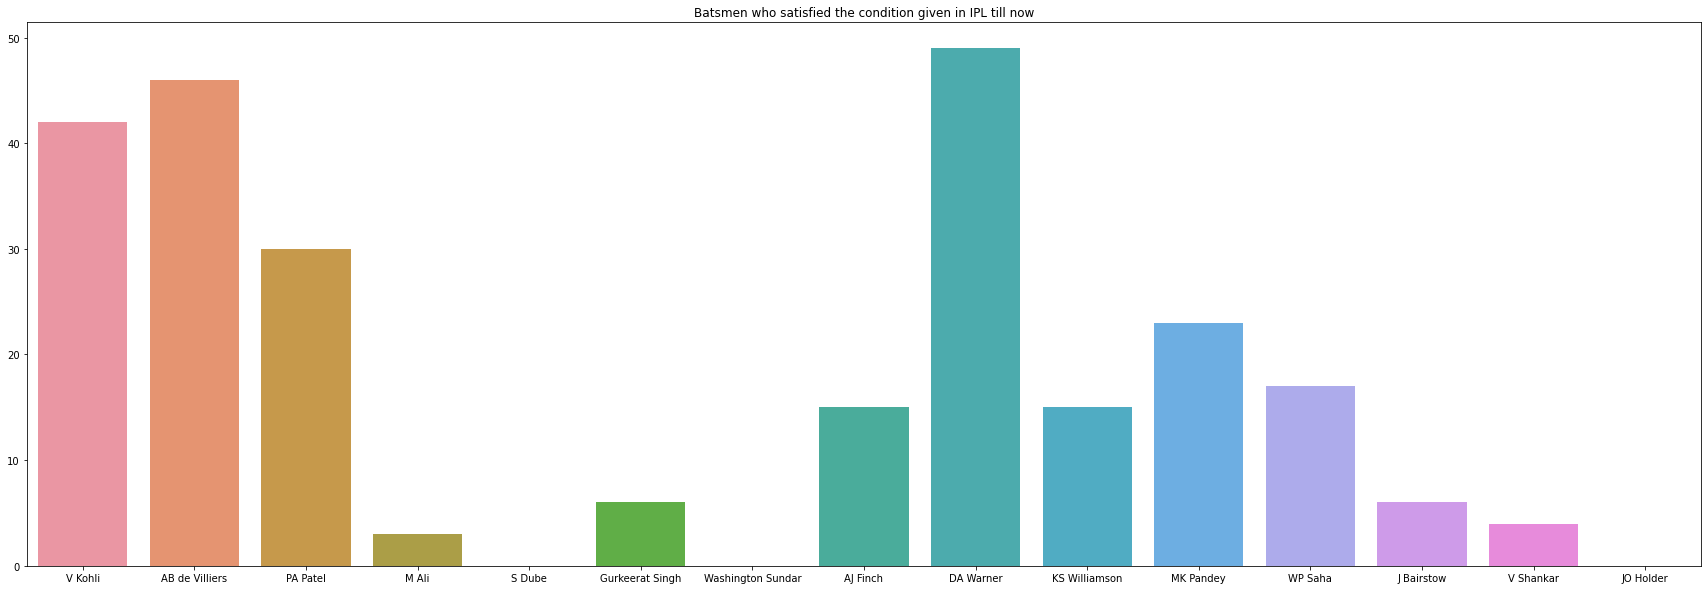

In [23]:
strike_rate_overall = pd.Series(list(strike_rate_dict_overall.values()),index = list(strike_rate_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x = strike_rate_overall.index, y = strike_rate_overall,ax=ax)
plt.title('Batsmen who satisfied the condition given in IPL till now')
plt.show()

**David Warner most of the time satisfied the conditions given among current Bangalore and Hyderabad batsmen in overall IPL till now followed by Virat Kohli and AB de Villiers**

## Which batsmen will have the highest (number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio in the match:

In [24]:
batsman = ['V Kohli', 'AB de Villiers', 'PA Patel', 'M Ali', 'S Dube', 'Gurkeerat Singh', 'Washington Sundar', 'DA Warner', 'KS Williamson', 'MK Pandey', 'WP Saha', 'J Bairstow', 'V Shankar']
ratio_dict = {}
for j in batsman:
    ratio_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        ratio = 999
        for i in batsman_runs:
            if i >= 4:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        if len(batsman_runs) > 10:
            ratio = (boundary_run - without_boundary_run)/total_run
        else:
            ratio = 999
        if ratio != 999:
            ratio_list.append(ratio)
    if len(ratio_list) != 0:
        ratio_dict[j] = ratio_list
for k,v in ratio_dict.items():
    ratio_dict[k] = np.round(np.mean(v),2)
ratio_dict

{'V Kohli': 0.22,
 'AB de Villiers': 0.27,
 'PA Patel': 0.2,
 'M Ali': 0.35,
 'Gurkeerat Singh': 0.1,
 'DA Warner': 0.31,
 'KS Williamson': 0.21,
 'MK Pandey': 0.05,
 'WP Saha': 0.52,
 'J Bairstow': 0.57,
 'V Shankar': 0.33}

These are the ratios of batsmen in Bangalore vs Hyderabad match.

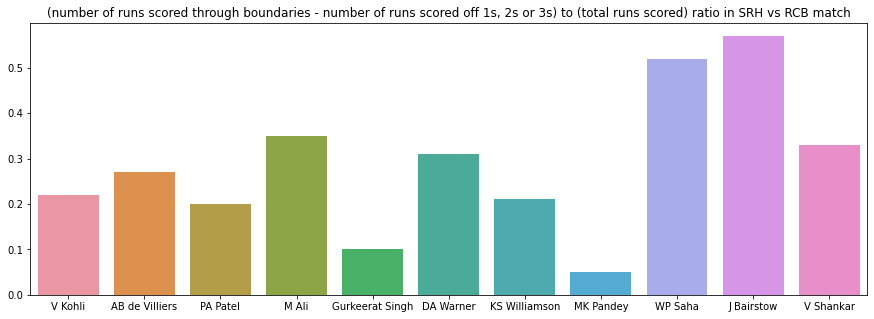

In [25]:
ratio = pd.Series(list(ratio_dict.values()),index = list(ratio_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = ratio.index, y = ratio,ax=ax)
plt.title('(number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio in SRH vs RCB match')
plt.show()

**So Johnny Bairstow has the highest (number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio among all current SRH and RCB players in SRH vs RCB match followed by Wriddhiman Saha.**

In [26]:
batsman_overall = ['V Kohli', 'AB de Villiers', 'PA Patel', 'M Ali', 'S Dube', 'Gurkeerat Singh', 'Washington Sundar', 'AJ Finch', 'DA Warner', 'KS Williamson', 'MK Pandey', 'WP Saha', 'J Bairstow', 'V Shankar','JO Holder']
ratio_dict_overall = {}
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    ratio_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        ratio = 999
        for i in batsman_runs:
            if i >= 4:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        if len(batsman_runs) >= 10:
            ratio = (boundary_run - without_boundary_run)/total_run
        else:
            ratio = 999
        if ratio != 999:
            ratio_list.append(ratio)
    if len(ratio_list) != 0:
        ratio_dict_overall[j] = ratio_list
for k,v in ratio_dict_overall.items():
    ratio_dict_overall[k] = np.round(np.mean(v),2)
ratio_dict_overall

{'V Kohli': 0.06,
 'AB de Villiers': 0.06,
 'PA Patel': 0.22,
 'M Ali': 0.41,
 'S Dube': 0.0,
 'Gurkeerat Singh': 0.13,
 'Washington Sundar': 0.19,
 'AJ Finch': 0.27,
 'DA Warner': 0.21,
 'KS Williamson': 0.03,
 'MK Pandey': -0.09,
 'WP Saha': 0.02,
 'J Bairstow': 0.31,
 'V Shankar': -0.17,
 'JO Holder': 0.75}

These are the ratios of Bangalore and Hyderabad batsmen in overall IPL.

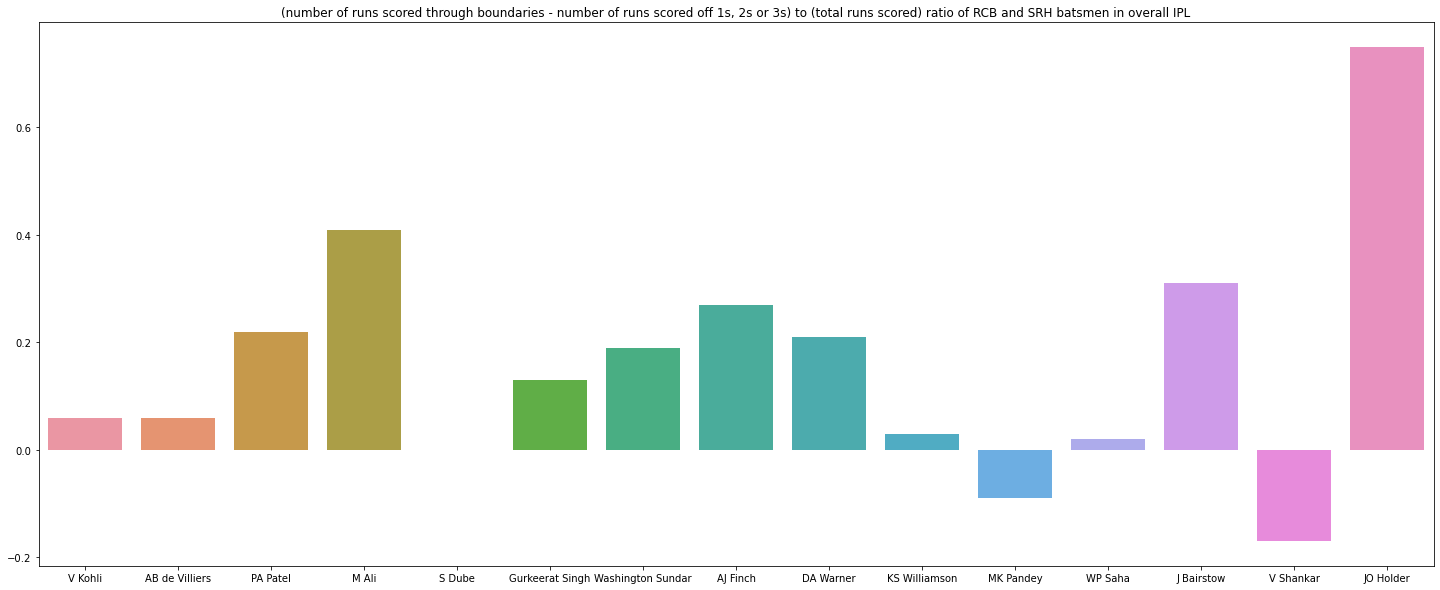

In [27]:
ratio_overall = pd.Series(list(ratio_dict_overall.values()),index = list(ratio_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x = ratio_overall.index, y = ratio_overall,ax=ax)
plt.title('(number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio of RCB and SRH batsmen in overall IPL')
plt.show()

**So Jason Holder has the highest (number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio among all current SRH and RCB players in overall IPL match followed by Moin Ali and Johnny Bairstow.**

## How many wickets totally will both the teams lose during the powerplay:

In [28]:
total_wickets_fallen = delivery[delivery['over']<=6]['player_dismissed'].count()
total_wickets_fallen

37

Total 37 wickets fallen in Bangalore vs Hyderabad match during the powerplay till now.

In [29]:
avg_wicket_fallen = np.round(total_wickets_fallen/len(ids))
avg_wicket_fallen

3.0

3 wickets in an average fallen during powerplay in Bangalore vs Hyderabad match during powerplay till now.

In [30]:
total_matches_Bangalore_batting_first_Hyderabad_batting_second = list(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] == 'Royal Challengers Bangalore')]['match_id'].unique())
len(total_matches_Bangalore_batting_first_Hyderabad_batting_second)

5

Bangalore batted in first innings in 5 matches against Hyderabad.

In [31]:
total_wickets_fallen_Bangalore_batting_first_Hyderabad_batting_second = 0
for i in total_matches_Bangalore_batting_first_Hyderabad_batting_second:
    total_wickets_fallen_Bangalore_batting_first_Hyderabad_batting_second += delivery[(delivery['match_id'] == i) & (delivery['over']<=6)]['player_dismissed'].count()
total_wickets_fallen_Bangalore_batting_first_Hyderabad_batting_second

12

Total 12 wickets fallen during powerplay when Bangalore batted in first inning and Hyderabad batted in second inning.

In [32]:
avg_wickets_fallen_Bangalore_batting_first_Hyderabad_batting_second = np.round(total_wickets_fallen_Bangalore_batting_first_Hyderabad_batting_second/len(total_matches_Bangalore_batting_first_Hyderabad_batting_second))
avg_wickets_fallen_Bangalore_batting_first_Hyderabad_batting_second

2.0

2 wickets in an average fallen per match during powerplay when Bangalore batted in first inning and Hyderabad batted in second inning.

In [33]:
total_matches_Hyderabad_batting_first_Bangalore_batting_second = list(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] == 'Sunrisers Hyderabad')]['match_id'].unique())
len(total_matches_Hyderabad_batting_first_Bangalore_batting_second)

9

Hyderabad batted in first innings in 9 matches against Bangalore.

In [34]:
total_wickets_fallen_Hyderabad_batting_first_Bangalore_batting_second = 0
for i in total_matches_Hyderabad_batting_first_Bangalore_batting_second:
    total_wickets_fallen_Hyderabad_batting_first_Bangalore_batting_second += delivery[(delivery['match_id'] == i) & (delivery['over']<=6)]['player_dismissed'].count()
total_wickets_fallen_Hyderabad_batting_first_Bangalore_batting_second

25

Total 25 wickets fallen during powerplay when Hyderabad batted in first inning and Bangalore batted in second inning.

In [35]:
avg_wickets_fallen_Hyderabad_batting_first_Bangalore_batting_second = np.round(total_wickets_fallen_Hyderabad_batting_first_Bangalore_batting_second/len(total_matches_Hyderabad_batting_first_Bangalore_batting_second))
avg_wickets_fallen_Hyderabad_batting_first_Bangalore_batting_second

3.0

3 wickets in an average fallen per match during powerplay when Hyderabad batted in first inning and Bangalore batted in second inning.

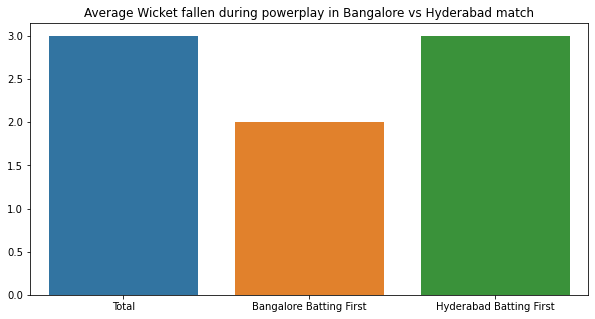

In [36]:
avg_wickets_per_match = pd.Series([avg_wicket_fallen,avg_wickets_fallen_Bangalore_batting_first_Hyderabad_batting_second,avg_wickets_fallen_Hyderabad_batting_first_Bangalore_batting_second],index=['Total','Bangalore Batting First','Hyderabad Batting First'])
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=avg_wickets_per_match.index,y=avg_wickets_per_match, ax=ax)
plt.title('Average Wicket fallen during powerplay in Bangalore vs Hyderabad match')
plt.show()

**So 2-3 wickets fallen during powerplay in Bangalore vs Hyderabad match till now.**